In [39]:
import pandas as pd

In [40]:
df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin1')
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [41]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary'],
      dtype='object')

Identify missing values and handle them appropriately.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4222 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [43]:
missing_values = df.isnull().sum()
print(missing_values)

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     776
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64


In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df.dtypes

Date                      object
Time                      object
Location                  object
Operator                  object
Flight #                  object
Route                     object
AC Type                   object
Registration              object
cn/ln                     object
Aboard                   float64
Aboard Passangers        float64
Aboard Crew              float64
Fatalities               float64
Fatalities Passangers    float64
Fatalities Crew          float64
Ground                   float64
Summary                   object
dtype: object

In [46]:
df['Flight #'].value_counts #shoul be object


<bound method IndexOpsMixin.value_counts of 0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
4993      NaN
4994    YT691
4995      NaN
4996      NaN
4997      NaN
Name: Flight #, Length: 4998, dtype: object>

In [47]:
df['cn/ln'].value_counts #shoul be object

<bound method IndexOpsMixin.value_counts of 0                1
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4993    31-7652004
4994           754
4995        110490
4996      208B0344
4997       35A-354
Name: cn/ln, Length: 4998, dtype: object>

Convert columns data and time to correct type

In [48]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')


In [49]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time


In [50]:
df.dtypes #Check

Date                     datetime64[ns]
Time                             object
Location                         object
Operator                         object
Flight #                         object
Route                            object
AC Type                          object
Registration                     object
cn/ln                            object
Aboard                          float64
Aboard Passangers               float64
Aboard Crew                     float64
Fatalities                      float64
Fatalities Passangers           float64
Fatalities Crew                 float64
Ground                          float64
Summary                          object
dtype: object

Let's fill missing values in all numerical columns with the mean of that column

In [51]:
# Get only the numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Fill missing values in all numerical columns with their respective means
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

Let's fill missing values in all non-numeric columns

In [52]:
non_numeric_columns = df.select_dtypes(exclude='number').columns

# Fill missing values in all non-numeric columns with 'N/A'
df[non_numeric_columns] = df[non_numeric_columns].fillna('N/A')

In [53]:
missing_values = df.isnull().sum() #check
print(missing_values)

Date                     0
Time                     0
Location                 0
Operator                 0
Flight #                 0
Route                    0
AC Type                  0
Registration             0
cn/ln                    0
Aboard                   0
Aboard Passangers        0
Aboard Crew              0
Fatalities               0
Fatalities Passangers    0
Fatalities Crew          0
Ground                   0
Summary                  0
dtype: int64


Exploratory Data Analysis

In [54]:
total_crashes = len(df)
total_fatalities = df['Fatalities'].sum()

# Calculate survival rate
total_aboard = df['Aboard'].sum()
total_survivors = total_aboard - total_fatalities
survival_rate = (total_survivors / total_aboard) * 100

# Display the results
print(f"Total crashes: {total_crashes}")
print(f"Total fatalities: {total_fatalities}")
print(f"Total survivors: {total_survivors}")
print(f"Survival rate: {survival_rate:.2f}%")

Total crashes: 4998
Total fatalities: 111822.9883767535
Total survivors: 44094.53933408986
Survival rate: 28.28%


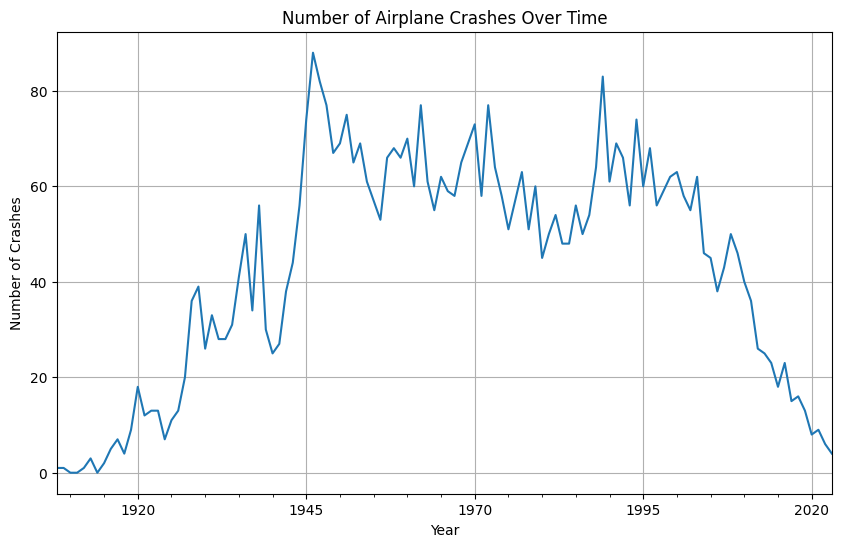

In [55]:

# Set 'Date' as the DataFrame index for time series analysis
df.set_index('Date', inplace=True)

# Resample the data by year and count the number of crashes per year
crashes_per_year = df.resample('Y').size()


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
crashes_per_year.plot(kind='line')
plt.title('Number of Airplane Crashes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()


Statistical Analysis

In [56]:
from scipy import stats

# Extracting fatalities and calculating statistics
fatalities = df['Fatalities']
fatalities_mean = fatalities.mean()
fatalities_median = fatalities.median()
fatalities_std = fatalities.std()

print(f"Fatalities Mean: {fatalities_mean:.2f}")
print(f"Fatalities Median: {fatalities_median}")
print(f"Fatalities Standard Deviation: {fatalities_std:.2f}")

# Calculating survival rates
aboard = df['Aboard']
survivors = aboard - fatalities
survival_rates = (survivors / aboard) * 100

# Calculating statistics for survival rates
survival_mean = survival_rates.mean()
survival_median = survival_rates.median()
survival_std = survival_rates.std()

print(f"\nSurvival Rates Mean: {survival_mean:.2f}%")
print(f"Survival Rates Median: {survival_median:.2f}%")
print(f"Survival Rates Standard Deviation: {survival_std:.2f}%")


Fatalities Mean: 22.37
Fatalities Median: 11.0
Fatalities Standard Deviation: 35.03

Survival Rates Mean: 18.28%
Survival Rates Median: 0.00%
Survival Rates Standard Deviation: 31.24%


Let's Conduct a hypothesis test  comparing the average number of fatalities in different regions

In [62]:
df['Location'].value_counts

<bound method IndexOpsMixin.value_counts of Date
1908-09-17                   Fort Myer, Virginia
1909-09-07               Juvisy-sur-Orge, France
1912-07-12             Atlantic City, New Jersey
1913-08-06    Victoria, British Columbia, Canada
1913-09-09                    Over the North Sea
                             ...                
2022-11-21                    Medellín, Colombia
2023-01-15                        Pokhara, Nepal
2023-09-16                      Barcelos, Brazil
2023-10-29                    Rio Branco, Brazil
2023-11-01                      Morelos,  Mexico
Name: Location, Length: 4998, dtype: object>

In [64]:
from scipy import stats

# Grouping data by 'Location' and collecting fatalities for each region
regions = df['Location'].unique()
region_fatalities = {region: df[df['Location'] == region]['Fatalities'] for region in regions}

#ANOVA test
f_stat, p_value = stats.f_oneway(*region_fatalities.values())


alpha = 0.05
print(f"ANOVA test: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average fatalities among different regions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average fatalities among different regions.")


ANOVA test: F-statistic = 1.40, p-value = 0.0000
Reject the null hypothesis: There is a significant difference in average fatalities among different regions.


Visualization

Plot of crashes over years

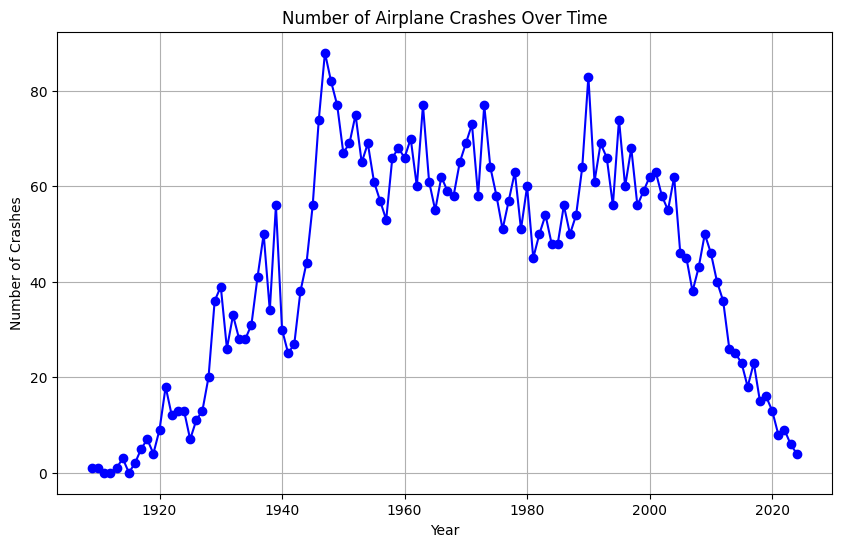

In [73]:
import matplotlib.pyplot as plt
years = crashes_per_year.index
crashes = crashes_per_year.values

plt.figure(figsize=(10, 6))
plt.plot(years, crashes, marker='o', linestyle='-', color='b')
plt.title('Number of Airplane Crashes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()



The time series analysis showed variations in crash frequency over the years. While there might not be a consistent trend, periodic fluctuations or specific years with higher/lower crash rates could be identified.
We can observe that now there are much less fatalities than it was before.

Histogram of fatalities

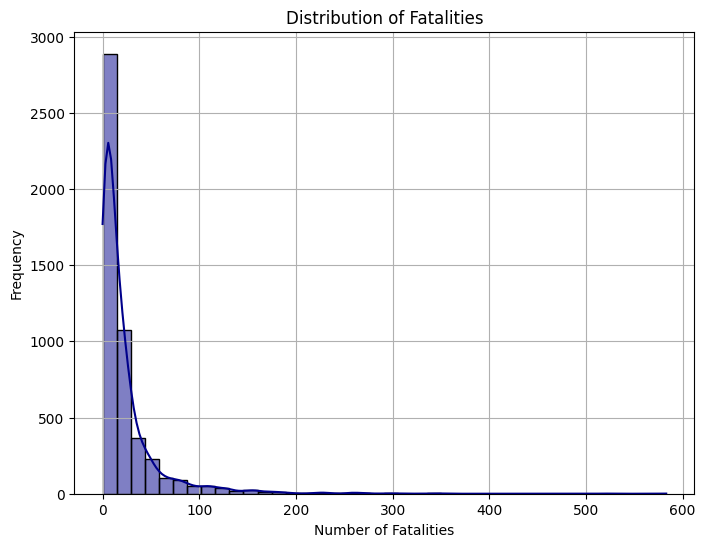

In [76]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Fatalities'], bins=40, kde=True, color='darkblue')
plt.title('Distribution of Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Histograms and visualizations of fatalities provided a clearer understanding of the spread and concentration of fatalities in different incidents.

Bar charts of crashes by region - only top 10 locations

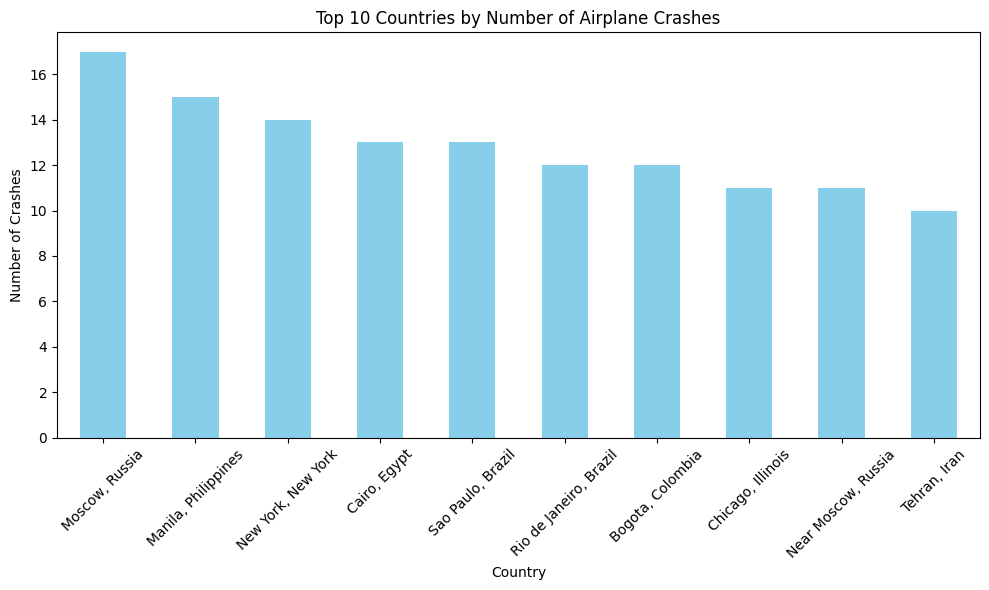

In [77]:
import matplotlib.pyplot as plt

top_10_countries = df['Location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Number of Airplane Crashes')
plt.xlabel('Country')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


When focusing on the top 10 locations with the highest crash counts, it became evident which regions were more prone to airplane crashes.
Examination of crash occurrences across different regions highlighted disparities in the number of crashes. Certain regions consistently experienced more crashes than others, indicating potential differences in safety measures, regulations, or other factors affecting aviation safety.